# OMAC STATE analysis

Find the running state of the machines.  The only machines that use OMACSTATE on AL6 are the Assembly and Packaging

Tags for Machines:

|IP_TAG Name   |Machine|
|--------------|-------|
|36630901_OMACSTATE|Assembly|
|36640901_RUN|Labeler|
|36650901_OMACSTATE|Packaging (Pacemaker!)|
|N/A|Cartoner|   
|N/A|Palletizer|    


OMAC State

|State|Mode|
|-----|----|
|0|Undefined|
|8|aborting|
|9|aborted|
|1|clearing|
|3|Setup|
|16|Basic|
|7|stopping|
|17|ChangeOver|
|2|stopped| 
|18|Cleaning|
|15|resetting|
|4|idle|
|3|starting|
|6|execute|
|13|suspending|
|5|suspended|
|14|unsuspending|
|10|holding|
|11|held|
|12|unholding|
|16|completing|
|17|complete|

In [1]:
import pandas as pd
import numpy as np
import os
from glob import iglob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import set_config
from common_functions import create_df_from_file

dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_local = set_config.ConfigSectionMap("SectionOne")['local']


In [2]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

def STATE_Files():

    df_omac = create_df_from_file(dir_sanofi_share, folder, "_OMACSTATE.csv" )

    # convert dates to datetime format
    df_omac['IP_TREND_TIME'] = pd.to_datetime(df_omac['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
    df_omac.set_index('IP_TREND_TIME', inplace=True)

    df_omac.loc[df_omac['Name'] == '36630901_OMACSTATE', 'Machine'] = 'Assembly'
    df_omac.loc[df_omac['Name'] == '36650901_OMACSTATE', 'Machine'] = 'Packaging'


    df_omac.sort_index(inplace=True)

    machines = df_omac.Machine.unique()

    for x in machines:
        df_omac.loc[df_omac.Machine == x, 'Time_Diff_Secs'] = df_omac.index[df_omac.Machine == x].sort_values().to_series().diff().dt.seconds.shift(-1)


    df_omac['IP_TREND_VALUE'].replace({
    0:'0 Undefined',
    8:'8 aborting',
    9:'9 aborted',
    1:'1 clearing',
    3:'3 Setup',
    16:'16 Basic',
    7:'7 stopping',
    17:'17 ChangeOver',
    2:'2 stopped', 
    18:'18 Cleaning',
    15:'15 resetting',
    4:'4 idle',
    3:'3 starting',
    6:'6 execute',
    13:'13 suspending',
    5:'5 suspended',
    14:'14 unsuspending',
    10:'10 holding',
    11:'11 held',
    12:'12 unholding',
    16:'16 completing',
    17:'17 complete'
    }, inplace=True)

    return df_omac



In [3]:
def RUN_Files():

    df_run = create_df_from_file(dir_sanofi_share, folder, "36640901_RUN" )

    # convert dates to datetime format
    df_run['IP_TREND_TIME'] = pd.to_datetime(df_run['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
    df_run.set_index('IP_TREND_TIME', inplace=True)

    df_run.loc[df_run['Name'] == '36640901_RUN', 'Machine'] = 'Labeler'

    # need to shift the time diff to the previous row - we are being told what the state has changed to, not what state it's been in
    df_run['Time_Diff_Secs'] = df_run.index.sort_values().to_series().diff().dt.seconds.shift(-1)

    return df_run

In [4]:
df_omac = STATE_Files()
df_run = RUN_Files()

In [5]:
df_omac

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
IP_TREND_TIME,,,,,,
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0
2021-08-01 00:28:22.500,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0


# THE FOLLOWING IS JUST GROUPBY AND CHARTING

In [6]:
df_omac[df_omac.Machine == 'Assembly'].sort_values(['Machine','IP_TREND_TIME'],ascending=[False, True]).head(30)

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
IP_TREND_TIME,,,,,,
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0
2021-08-01 00:28:55.300,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,5.0
2021-08-01 00:29:00.400,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-08-01 00:29:01.400,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-08-01 00:29:03.500,36630901_OMACSTATE,6 execute,Good,Good,Assembly,95.0
2021-08-01 00:30:38.700,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,4.0


In [9]:
df_omac[df_omac['Time_Diff_Secs'].isna()]

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
IP_TREND_TIME,,,,,,
2021-09-30 23:59:06.000,36650901_OMACSTATE,2 stopped,Good,Good,Packaging,NaN
2021-09-30 23:59:56.200,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,NaN


In [10]:
df_omac.groupby(['Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()

Machine    IP_TREND_VALUE 
Assembly   19                      29.0
           23                       2.0
           0 Undefined            841.0
           1 clearing            7154.0
           10 holding              33.0
           11 held             264795.0
           12 unholding           395.0
           13 suspending            4.0
           14 unsuspending          3.0
           15 resetting             1.0
           18 Cleaning           5873.0
           2 stopped           856023.0
           3 starting            3824.0
           4 idle              221989.0
           5 suspended             60.0
           6 execute          1004861.0
           7 stopping         1223585.0
           9 aborted             4048.0
Packaging  0 Undefined              3.0
           1 clearing               5.0
           15 resetting         29511.0
           16 completing        20768.0
           2 stopped          1066528.0
           4 idle               79755.0
           6 

In [11]:
df_omac_unstacked = df_omac.groupby(['Machine', pd.Grouper(freq='D'), 'IP_TREND_VALUE'])['Time_Diff_Secs'].sum().unstack().reset_index()
df_omac_unstacked.set_index('IP_TREND_TIME', inplace=True)
df_omac_unstacked

IP_TREND_VALUE,Machine,19,23,0 Undefined,1 clearing,10 holding,11 held,12 unholding,13 suspending,14 unsuspending,...,16 completing,18 Cleaning,2 stopped,3 starting,4 idle,5 suspended,6 execute,7 stopping,8 aborting,9 aborted
IP_TREND_TIME,,,,,,,,,,,,,,,,,,,,,
2021-08-01,Assembly,NaN,NaN,NaN,14.0,NaN,271.0,NaN,NaN,NaN,...,NaN,39.0,39581.0,17.0,32.0,NaN,4372.0,6693.0,NaN,NaN
2021-08-02,Assembly,NaN,NaN,NaN,43.0,2.0,4906.0,NaN,NaN,NaN,...,NaN,108.0,7155.0,43.0,4409.0,NaN,7911.0,10146.0,NaN,NaN
2021-08-03,Assembly,1.0,NaN,NaN,180.0,NaN,5918.0,NaN,NaN,NaN,...,NaN,138.0,14475.0,130.0,4306.0,NaN,29162.0,31280.0,NaN,NaN
2021-08-04,Assembly,1.0,NaN,NaN,63.0,NaN,290.0,NaN,NaN,NaN,...,NaN,120.0,23232.0,67.0,3070.0,1.0,27488.0,31233.0,NaN,NaN
2021-08-05,Assembly,NaN,NaN,NaN,93.0,3.0,4039.0,NaN,NaN,NaN,...,NaN,137.0,19679.0,99.0,13351.0,NaN,24827.0,27515.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,Packaging,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,766.0,NaN,10944.0,NaN,317.0,NaN,3519.0,335.0,6.0,4974.0
2021-09-27,Packaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17075.0,NaN,1688.0,NaN,42281.0,1582.0,NaN,1.0
2021-09-28,Packaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,654.0,NaN,33319.0,NaN,2842.0,NaN,35552.0,2236.0,32.0,10742.0


In [12]:
# not sure whether to change the state codes to categories/labels - might lose some use for numbers later

df_omac_unstacked.rename(columns={
0:'0 Undefined',
8:'8 aborting',
9:'9 aborted',
1:'1 clearing',
3:'3 Setup',
16:'16 Basic',
7:'7 stopping',
17:'17 ChangeOver',
2:'2 stopped', 
18:'18 Cleaning',
15:'15 resetting',
4:'4 idle',
3:'3 starting',
6:'6 execute',
13:'13 suspending',
5:'5 suspended',
14:'14 unsuspending',
10:'10 holding',
11:'11 held',
12:'12 unholding',
16:'16 completing',
17:'17 complete'
}, inplace=True)

In [13]:
# high_states = pd.DataFrame(df_omac_unstacked.iloc[:,1:][df_omac_unstacked.Machine == x].sum().nlargest(5))
high_states = pd.DataFrame(df_omac_unstacked.iloc[:,1:][df_omac_unstacked.Machine == x].sum()>0)

high_states.T.columns


NameError: name 'x' is not defined

In [14]:
df_omac.groupby(['Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].agg('sum','count')

Machine    IP_TREND_VALUE 
Assembly   19                      29.0
           23                       2.0
           0 Undefined            841.0
           1 clearing            7154.0
           10 holding              33.0
           11 held             264795.0
           12 unholding           395.0
           13 suspending            4.0
           14 unsuspending          3.0
           15 resetting             1.0
           18 Cleaning           5873.0
           2 stopped           856023.0
           3 starting            3824.0
           4 idle              221989.0
           5 suspended             60.0
           6 execute          1004861.0
           7 stopping         1223585.0
           9 aborted             4048.0
Packaging  0 Undefined              3.0
           1 clearing               5.0
           15 resetting         29511.0
           16 completing        20768.0
           2 stopped          1066528.0
           4 idle               79755.0
           6 

In [15]:
# for x in machines:
    # print (Cumulative time (secs) spent in each state for {} Machine\n\n'.format(x), df_omac_unstacked.iloc[:,1:][df_omac_unstacked.Machine == x].sum().sort_values(ascending=False))
    
    # print ('Cumulative time (secs) spent in each state for {} Machine\n\n'.format(x), df_omac_unstacked.iloc[:,1:][(df_omac_unstacked.Machine == x) & ()].sum()>10000)
    # state_total_time = pd.DataFrame(df_omac_unstacked.iloc[:,1:][df_omac_unstacked.Machine == x].sum())
    # print ('Cumulative time (secs) spent in each state for {} Machine\n\n'.format(x), state_total_time[state_total_time > 10000].sort_values(by=0, ascending=False))


df_omac.groupby(['Machine','IP_TREND_VALUE']).sum()

Time_Diff_Secs
Machine   IP_TREND_VALUE                 
Assembly  19                         29.0
          23                          2.0
          0 Undefined               841.0
          1 clearing               7154.0
          10 holding                 33.0
          11 held                264795.0
          12 unholding              395.0
          13 suspending               4.0
          14 unsuspending             3.0
          15 resetting                1.0
          18 Cleaning              5873.0
          2 stopped              856023.0
          3 starting               3824.0
          4 idle                 221989.0
          5 suspended                60.0
          6 execute             1004861.0
          7 stopping            1223585.0
          9 aborted                4048.0
Packaging 0 Undefined                 3.0
          1 clearing                  5.0
          15 resetting            29511.0
          16 completing           20768.0
          2 stopped             1066528.0
          4 idle                  79755.0
          6 execute             1985860.0
          7 stopping              74739.0
          8 aborting                509.0
          9 aborted              358944.0

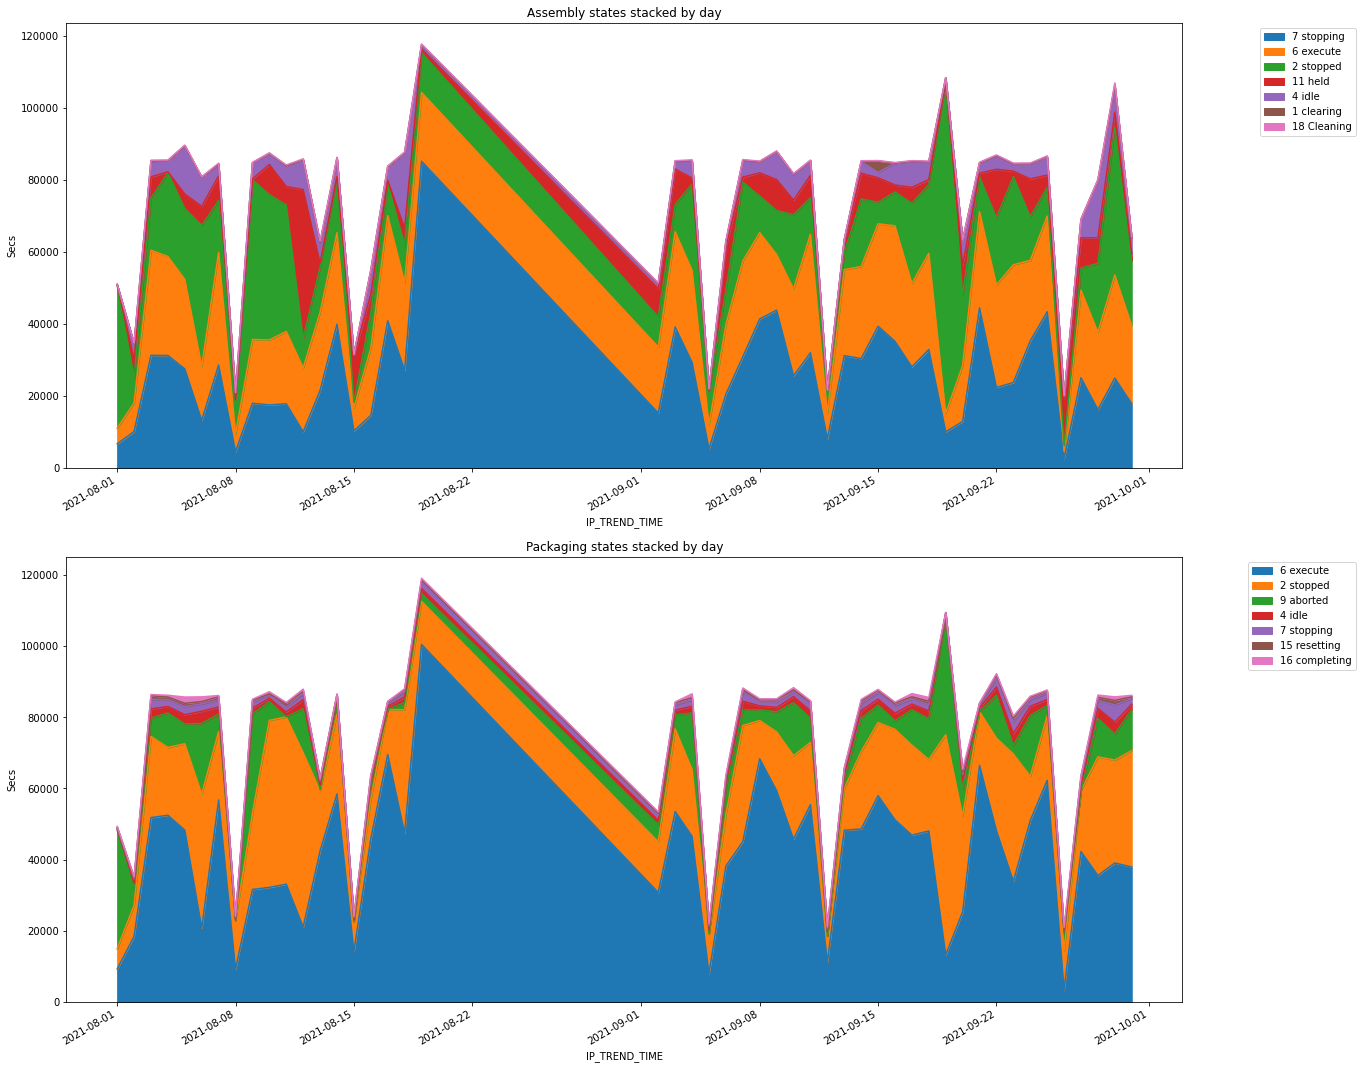

In [17]:
freq='1min'

machines = df_omac_unstacked.Machine.unique()

fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

i=0
for x in machines:
    
    high_states = pd.DataFrame(df_omac_unstacked.iloc[:,1:][df_omac_unstacked.Machine == x].sum().nlargest(7))
    cols = high_states.T.columns

    # group[group.Machine == x].hist(label=('{}'.format(x)), ax=axs[i])
    df_omac_unstacked[cols][df_omac_unstacked.Machine == x].plot.area(ax=axs[i])
    axs[i].set_title('{} states stacked by day'.format(x))
    axs[i].set_ylabel('Secs')
    axs[i].legend(loc='upper right', bbox_to_anchor=(1.16, 1.0))
    i+=1


In [18]:
df_run.sort_index(inplace=True)

In [19]:
df_run_unstacked.plot.area(figsize=(17,10))
plt.title=('Labeler running status')
plt.set_ylabel=('Elapsed secs')

NameError: name 'df_run_unstacked' is not defined

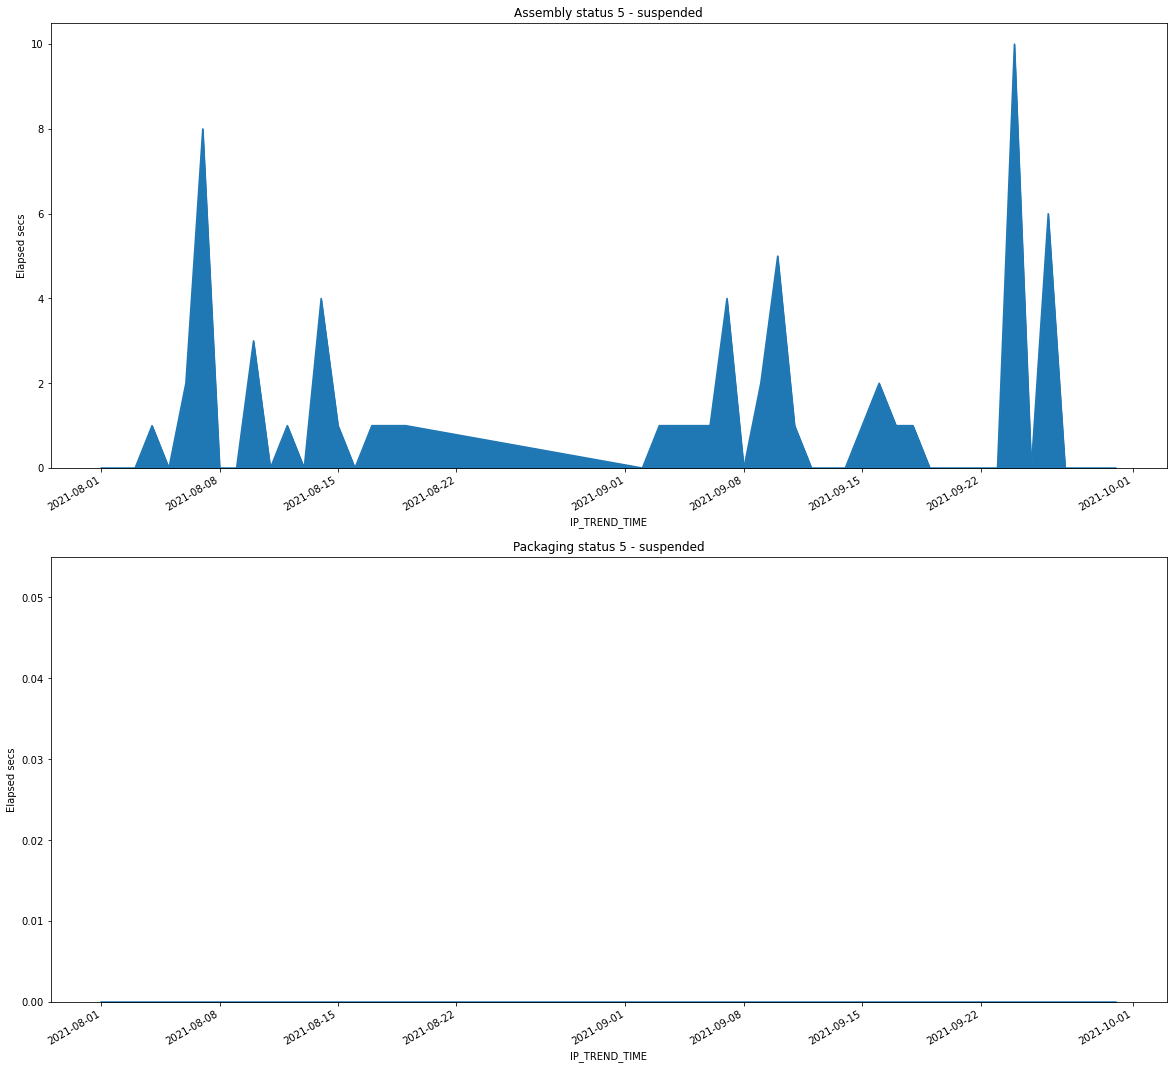

In [20]:
fig, axs = plt.subplots(len(machines), 1, figsize=(20, 20))

i=0
for x in machines:
    # group[group.Machine == x].hist(label=('{}'.format(x)), ax=axs[i])
    df_omac_unstacked[(df_omac_unstacked.Machine == x)]['5 suspended'].plot.area(ax=axs[i])
    axs[i].set_title('{} status 5 - suspended'.format(x))
    axs[i].set_ylabel('Elapsed secs')
    i+=1


In [21]:
df_omac[df_omac.IP_TREND_VALUE == 5].groupby(['Machine','IP_TREND_VALUE']).sum()

,,Time_Diff_Secs
Machine,IP_TREND_VALUE,


In [22]:
df_omac[df_omac.Machine == 'Assembly'].sort_index()

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
IP_TREND_TIME,,,,,,
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0
2021-08-01 00:28:55.300,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,5.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0


In [23]:
df_run.groupby(['Machine', pd.Grouper(freq='D'), 'IP_TREND_VALUE'])['Time_Diff_Secs'].sum().head(30)

Machine  IP_TREND_TIME  IP_TREND_VALUE
Labeler  2021-08-01     0                 76332.0
                        1                 10032.0
         2021-08-02     0                 68935.0
                        1                 17175.0
         2021-08-03     0                 33800.0
                        1                 52042.0
         2021-08-04     0                 37130.0
                        1                 49514.0
         2021-08-05     0                 38914.0
                        1                 46978.0
         2021-08-06     0                 61038.0
                        1                 25204.0
         2021-08-07     0                 31245.0
                        1                 54956.0
         2021-08-08     0                 78102.0
                        1                  8668.0
         2021-08-09     0                 53160.0
                        1                 32571.0
         2021-08-10     0                 53212.0
           

In [24]:
df_omac.loc['2021-09-30'].groupby([pd.Grouper(freq='D'),'Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()

IP_TREND_TIME  Machine    IP_TREND_VALUE
2021-09-30     Assembly   19                    2.0
                          1 clearing           79.0
                          11 held            1970.0
                          18 Cleaning         191.0
                          2 stopped         18030.0
                          3 starting           99.0
                          4 idle             4400.0
                          6 execute         21646.0
                          7 stopping        17856.0
               Packaging  1 clearing            3.0
                          15 resetting        492.0
                          16 completing       423.0
                          2 stopped         32698.0
                          4 idle             1580.0
                          6 execute         37934.0
                          7 stopping         1554.0
                          8 aborting           17.0
                          9 aborted         11457.0
Name: Time_Diff_Secs, d

In [25]:
df_omac.loc['2021-09-30']

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
IP_TREND_TIME,,,,,,
2021-09-30 00:00:00.300,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0
2021-09-30 00:00:03.400,36650901_OMACSTATE,4 idle,Good,Good,Packaging,6.0
2021-09-30 00:00:09.600,36650901_OMACSTATE,16 completing,Good,Good,Packaging,2.0
2021-09-30 00:00:11.700,36650901_OMACSTATE,7 stopping,Good,Good,Packaging,9.0
2021-09-30 00:00:20.900,36650901_OMACSTATE,2 stopped,Good,Good,Packaging,2.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0


In [26]:
groupby = df_omac.groupby(['Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_pcts = groupby.groupby(level=0).apply(lambda x: round(100 * x/ float(x.sum()),3)).reset_index()
groupby_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
groupby_pcts.sort_values(['Machine','Pct_of_Total'], ascending = [True,False])
# groupby_pcts.sort_values('Pct_of_Total', ascending=False)
# groupby_pcts.sort_values(level=0, ascending=False)

,Machine,IP_TREND_VALUE,Pct_of_Total
16,Assembly,7 stopping,34.050
15,Assembly,6 execute,27.963
11,Assembly,2 stopped,23.821
5,Assembly,11 held,7.369
13,Assembly,4 idle,6.177
3,Assembly,1 clearing,0.199
10,Assembly,18 Cleaning,0.163
17,Assembly,9 aborted,0.113
12,Assembly,3 starting,0.106
2,Assembly,0 Undefined,0.023


In [27]:
groupby_min = df_omac.groupby([pd.Grouper(freq='D'),'Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_pcts = groupby_min.groupby(level=0).apply(lambda x: 100 * x/ float(x.sum())).reset_index()
groupby_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
groupby_pcts.sort_values(['Machine','IP_TREND_TIME','Pct_of_Total'], ascending = [True,True,False]).head(30)
groupby_pcts

,IP_TREND_TIME,Machine,IP_TREND_VALUE,Pct_of_Total
0,2021-08-01,Assembly,1 clearing,0.013949
1,2021-08-01,Assembly,11 held,0.270009
2,2021-08-01,Assembly,18 Cleaning,0.038857
3,2021-08-01,Assembly,2 stopped,39.436269
4,2021-08-01,Assembly,3 starting,0.016938
...,...,...,...,...
839,2021-09-30,Packaging,4 idle,1.050315
840,2021-09-30,Packaging,6 execute,25.216877
841,2021-09-30,Packaging,7 stopping,1.033032
842,2021-09-30,Packaging,8 aborting,0.011301


In [28]:
groupby_min = df_omac.groupby([pd.Grouper(freq='60s'),'Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_min_pcts = groupby_min.groupby(level=0).apply(lambda x: 100 * x/ float(x.sum())).reset_index()
groupby_min_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
groupby_min_pcts.sort_values(['Machine','IP_TREND_TIME','Pct_of_Total'], ascending = [True,True,False]).head(30)
groupby_min_pcts

,IP_TREND_TIME,Machine,IP_TREND_VALUE,Pct_of_Total
0,2021-08-01 00:03:00,Assembly,2 stopped,100.000000
1,2021-08-01 00:27:00,Assembly,18 Cleaning,87.500000
2,2021-08-01 00:27:00,Assembly,3 starting,12.500000
3,2021-08-01 00:28:00,Assembly,6 execute,46.363636
4,2021-08-01 00:28:00,Assembly,7 stopping,4.545455
...,...,...,...,...
106636,2021-09-30 23:58:00,Assembly,7 stopping,63.793103
106637,2021-09-30 23:58:00,Packaging,7 stopping,15.517241
106638,2021-09-30 23:59:00,Assembly,6 execute,18.867925
106639,2021-09-30 23:59:00,Assembly,7 stopping,81.132075


In [29]:
# write out to excel
folder='IP21_data'
filename = 'omac_state.csv'
path = os.path.join(dir_sanofi_share, folder, filename)
groupby_min_pcts.to_csv(path)

NameError: name 'groupby_min_pct' is not defined

In [30]:
groupby_run_min = df_run.groupby([pd.Grouper(freq='60s'),'IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_run_min_pcts = groupby_run_min.groupby(level=0).apply(lambda x: 100 * x/ float(x.sum())).reset_index()
groupby_run_min_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
groupby_run_min_pcts.sort_values('Pct_of_Total', ascending = False)
groupby_run_min_pcts

,IP_TREND_TIME,IP_TREND_VALUE,Pct_of_Total
0,2021-08-01 00:08:00,0,100.000000
1,2021-08-01 00:18:00,0,100.000000
2,2021-08-01 00:28:00,0,23.469388
3,2021-08-01 00:28:00,1,76.530612
4,2021-08-01 00:29:00,0,100.000000
...,...,...,...
16865,2021-09-30 23:29:00,1,100.000000
16866,2021-09-30 23:39:00,0,95.850622
16867,2021-09-30 23:39:00,1,4.149378
16868,2021-09-30 23:47:00,1,100.000000


In [31]:
# write out to excel
folder='IP21_data'
filename = 'labeler_run_state.csv'
path = os.path.join(dir_sanofi_share, folder, filename)
groupby_run_min_pcts.to_csv(path)

## read in the alarms and derive and suspended state

o	Can we see a measure of the buffer size in the IP21 or alarm data at all?
If the buffer from Assembly to Labeller is full, the Assembly should change its OMAC State to 5 (suspended). I looked it up but it DOESN´T DO THAT. BUT you can see this in the alarm data!
The Alarmcode is: Warnung;2018-12-11 06:44:15;2018-12-11 06:44:50;1198;1462-7B1 Standby: Max. Stau Abführband erreicht;0..Flt[1198]
When this message is there, the buffer from Assembly to Labeller is full.
Then next when the Buffer between Labeller and Packaging is full the Labeller will show this message:
00000080;MMA;0;2;L;17.01.2019;04:34:13;+01:00;Devicestau im Auslauf ;0368;;;;;Bediener;80681342;9F156A


In [32]:
folder='Alarms_data'
filename = 'alarms.csv'
path = os.path.join(dir_sanofi_share, folder, filename)
# parse_dates and index datafram
df_alarms = pd.read_csv(path, encoding='UTF-8', parse_dates=True, index_col='Start')
df_alarms.sort_index(inplace=True)
df_alarms.drop(['Unnamed: 0'], axis=1, inplace=True)
# df = pd.read_csv(r'C:\Users\Raza-PC\Documents\McLaren\Sanofi\Sanofi\alarms.csv')

C:\Users\mark_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [361]:
df_alarms = df_alarms[df_alarms.duplicated(keep='last')]

In [363]:
df_suspended = df_alarms[df_alarms['Message Text (English)'].str.contains('1462-7B1')]
df_suspended = df_suspended.loc['2021-08-01':'2021-09-30']

In [364]:
df = pd.DataFrame({'Name':'1462-7B1 Alarm',
                    'IP_TREND_VALUE':'5 suspended',
                    'IP_TREND_QLEVEL':'Good',
                    'IP_TREND_QSTATUS':'Good',
                    'Machine':'Assembly',
                    'Time_Diff_Secs':df_suspended.Duration
                    })
df

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
Start,,,,,,
2021-08-01 01:17:42,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0
2021-08-01 01:19:03,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,8.0
2021-08-01 01:49:54,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0
2021-08-01 03:35:37,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,9.0
2021-08-01 04:21:04,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,73.0
...,...,...,...,...,...,...
2021-09-30 19:45:41,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,60.0
2021-09-30 19:50:14,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,103.0
2021-09-30 23:53:42,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0


In [365]:
df_omac_new = df_omac.append(df)
df_omac_new.sort_index(inplace=True)
df_omac_new

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0
2021-08-01 00:28:22.500,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0
2021-09-30 23:59:55.100,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0


In [344]:
df_omac_new.reset_index(inplace=True)


In [345]:
df_omac_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345930 entries, 0 to 345929
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             345930 non-null  datetime64[ns]
 1   Name              345930 non-null  object        
 2   IP_TREND_VALUE    345930 non-null  object        
 3   IP_TREND_QLEVEL   345930 non-null  object        
 4   IP_TREND_QSTATUS  345930 non-null  object        
 5   Machine           345930 non-null  object        
 6   Time_Diff_Secs    345920 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 18.5+ MB


In [346]:
# going to fix these rows
df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm') | (df_omac_new.Name == '1462-7B1 Alarm')]

,index,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
12,2021-08-01 00:29:02.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,95.0
13,2021-08-01 00:29:03.500,36630901_OMACSTATE,6 execute,Good,Good,Assembly,95.0
35,2021-08-01 00:30:56.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,29.0
36,2021-08-01 00:30:58.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,28.0
73,2021-08-01 00:33:37.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,1655.0
...,...,...,...,...,...,...,...
345843,2021-09-30 23:50:23.100,36630901_OMACSTATE,6 execute,Good,Good,Assembly,59.0
345865,2021-09-30 23:53:42.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0
345866,2021-09-30 23:53:44.100,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,1.0
345869,2021-09-30 23:54:04.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0


In [347]:
df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')]['index']

13       2021-08-01 00:29:03.500
36       2021-08-01 00:30:58.200
74       2021-08-01 00:33:38.600
138      2021-08-01 01:03:49.100
361      2021-08-01 01:16:45.800
                   ...          
345489   2021-09-30 22:51:00.400
345494   2021-09-30 22:51:21.700
345843   2021-09-30 23:50:23.100
345866   2021-09-30 23:53:44.100
345870   2021-09-30 23:54:06.700
Name: index, Length: 9369, dtype: datetime64[ns]

In [348]:
df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')]['index'] + pd.to_timedelta(df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')]['Time_Diff_Secs'], unit='s')

13       2021-08-01 00:30:38.500
36       2021-08-01 00:31:26.200
74       2021-08-01 00:38:38.600
138      2021-08-01 01:05:14.100
361      2021-08-01 01:17:36.800
                   ...          
345489   2021-09-30 22:51:14.400
345494   2021-09-30 22:51:33.700
345843   2021-09-30 23:51:22.100
345866   2021-09-30 23:53:45.100
345870   2021-09-30 23:54:19.700
Length: 9369, dtype: datetime64[ns]

In [349]:
# create new_start as alarm time + alarm duration
df_omac_new['new_start'] = df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')]['index'] + pd.to_timedelta(df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')]['Time_Diff_Secs'], unit='s')
# copy existing timestamp where we haven't just created a new_start
df_omac_new.new_start.fillna(df_omac_new['index'], inplace=True)
# make sure the dataframe is sorted
df_omac_new.sort_values(['new_start'], inplace=True)
# recalc the time_diff fir the execute rows against the newly inserted alarm row
df_omac_new.loc[df_omac_new.Machine == 'Assembly', 'New_Time_Diff_Secs'] = df_omac_new.new_start[(df_omac_new.Machine == 'Assembly') & (df_omac_new.IP_TREND_VALUE == '6 execute')].sort_values().diff().dt.seconds.shift(-1)
# copy existing time diff for all the other rows
df_omac_new.New_Time_Diff_Secs.fillna(df_omac_new['Time_Diff_Secs'], inplace=True)
# drop the old timestamp index col
df_omac_new.drop(columns={'index'}, inplace=True)
# set index as the new_start timestamp col
df_omac_new.set_index('new_start', inplace=True)

In [350]:
df_omac_new

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs,New_Time_Diff_Secs
new_start,,,,,,,
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0,56.0
2021-08-01 00:28:22.500,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0,3.0
...,...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0,19.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0,18.0


In [351]:
df_omac_new[df_omac_new.Name.shift(1) == '1462-7B1 Alarm']

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs,New_Time_Diff_Secs
new_start,,,,,,,
2021-08-01 00:29:17.800,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,1.0,1.0
2021-08-01 00:31:26.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,28.0,2.0
2021-08-01 00:38:38.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,300.0,1367.0
2021-08-01 01:04:25.100,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,2.0,2.0
2021-08-01 01:17:36.800,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0,4.0
...,...,...,...,...,...,...,...
2021-09-30 22:51:14.400,36630901_OMACSTATE,6 execute,Good,Good,Assembly,14.0,2.0
2021-09-30 22:51:33.700,36630901_OMACSTATE,6 execute,Good,Good,Assembly,12.0,5.0
2021-09-30 23:50:26.100,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0,3.0


In [352]:
# df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')].index + pd.to_timedelta(df_omac_new[df_omac_new.Name.shift(1) == '1462-7B1 Alarm')].Time_Diff_Secs, unit='s')
# rows after alarm
df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm') | (df_omac_new.Name == '1462-7B1 Alarm')]
# df_omac_new[(df_omac_new.Name.shift(1) == '1462-7B1 Alarm')].index + pd.to_timedelta(df_omac_new[df_omac_new.Name == '1462-7B1 Alarm'].Time_Diff_Secs, unit='s')

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs,New_Time_Diff_Secs
new_start,,,,,,,
2021-08-01 00:29:02.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,95.0,95.0
2021-08-01 00:29:17.800,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,1.0,1.0
2021-08-01 00:30:56.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,29.0,29.0
2021-08-01 00:31:26.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,28.0,2.0
2021-08-01 00:33:37.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,1655.0,1655.0
...,...,...,...,...,...,...,...
2021-09-30 23:50:26.100,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0,3.0
2021-09-30 23:53:42.000,1462-7B1 Alarm,5 suspended,Good,Good,Assembly,14.0,14.0
2021-09-30 23:53:45.100,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,1.0,1.0


In [353]:
df_omac_new.groupby([pd.Grouper(freq='60s'),'Machine','IP_TREND_VALUE']).sum().reset_index()

,new_start,Machine,IP_TREND_VALUE,Time_Diff_Secs,New_Time_Diff_Secs
0,2021-08-01 00:03:00,Assembly,2 stopped,1486.0,1486.0
1,2021-08-01 00:27:00,Assembly,18 Cleaning,7.0,7.0
2,2021-08-01 00:27:00,Assembly,3 starting,1.0,1.0
3,2021-08-01 00:28:00,Assembly,6 execute,51.0,56.0
4,2021-08-01 00:28:00,Assembly,7 stopping,5.0,5.0
...,...,...,...,...,...
115598,2021-09-30 23:58:00,Assembly,7 stopping,37.0,37.0
115599,2021-09-30 23:58:00,Packaging,7 stopping,9.0,9.0
115600,2021-09-30 23:59:00,Assembly,6 execute,10.0,53.0
115601,2021-09-30 23:59:00,Assembly,7 stopping,43.0,43.0


In [354]:
groupby = df_omac_new.groupby(['Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_pcts = groupby.groupby(level=0).apply(lambda x: round(100 * x/ float(x.sum()),3)).reset_index()
groupby_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
groupby_pcts.sort_values(['Machine','Pct_of_Total'], ascending = [True,False])
# groupby_pcts.sort_values('Pct_of_Total', ascending=False)




,Machine,IP_TREND_VALUE,Pct_of_Total
14,Assembly,5 suspended,27.834
16,Assembly,7 stopping,24.573
15,Assembly,6 execute,20.180
11,Assembly,2 stopped,17.191
5,Assembly,11 held,5.318
13,Assembly,4 idle,4.458
3,Assembly,1 clearing,0.144
10,Assembly,18 Cleaning,0.118
17,Assembly,9 aborted,0.081
12,Assembly,3 starting,0.077


In [355]:
groupby_min = df_omac_new.groupby([pd.Grouper(freq='60s'),'Machine','IP_TREND_VALUE'])['Time_Diff_Secs'].sum()
groupby_min_pcts = groupby_min.groupby(level=0).apply(lambda x: 100 * x/ float(x.sum())).reset_index()
groupby_min_pcts.rename(columns={'Time_Diff_Secs':'Pct_of_Total'}, inplace=True)
# groupby_min_pcts.sort_values(['Machine','IP_TREND_TIME','Pct_of_Total'], ascending = [True,True,False]).head(30)
groupby_min_pcts

,new_start,Machine,IP_TREND_VALUE,Pct_of_Total
0,2021-08-01 00:03:00,Assembly,2 stopped,100.000000
1,2021-08-01 00:27:00,Assembly,18 Cleaning,87.500000
2,2021-08-01 00:27:00,Assembly,3 starting,12.500000
3,2021-08-01 00:28:00,Assembly,6 execute,46.363636
4,2021-08-01 00:28:00,Assembly,7 stopping,4.545455
...,...,...,...,...
115598,2021-09-30 23:58:00,Assembly,7 stopping,63.793103
115599,2021-09-30 23:58:00,Packaging,7 stopping,15.517241
115600,2021-09-30 23:59:00,Assembly,6 execute,18.867925
115601,2021-09-30 23:59:00,Assembly,7 stopping,81.132075


In [357]:
# write out to excel
folder='IP21_data'
filename = 'omac_state_with_suspended.csv'
path = os.path.join(dir_sanofi_share, folder, filename)
groupby_min_pcts.to_csv(path, index=False)

# Get standby alarms

o	What happens when each is too full?
Between Assembly and Labeller the Assembly stops producing immediately (staying idle for 300 seconds (autostart), then stopps with message:
Alarm   13.02.2021 02:34             13.02.2021 02:57             100         Maschinenzustand "Standby" abgebrochen    0..Flt[100]
; Between Labeller and Packager the labeller slows down (until some sensors at the conveyor are triggered to run slower)  and finally runs empty (after some other sensors at the conveyor get triggered to open the clutch for the infeed, the machine itself doesn´t get an error, only stays Idle until the sensors are Untriggered again. See message in next question)


In [377]:
df_standby = df_alarms[df_alarms['Message Text'].str.contains('Maschinenzustand')]
df_standby = df_standby.loc['2021-08-01':'2021-09-30']
df_standby

,Message Text (English),Message Text,Duration,Filename,Machine,Significant
Start,,,,,,
2021-08-21 16:49:31,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",239.0,A210821.TXT,AL6_Montage,No
2021-08-25 14:49:55,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",275.0,A210825.TXT,AL6_Montage,No
2021-08-28 11:06:33,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",17.0,A210828.TXT,AL6_Montage,No
2021-08-30 11:30:14,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",188.0,A210830.TXT,AL6_Montage,No
2021-09-01 01:08:59,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",17.0,A210901.TXT,AL6_Montage,No
2021-09-02 21:55:34,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",160.0,A210902.TXT,AL6_Montage,No
2021-09-08 06:19:02,"Machine status ""Standby"" canceled","Maschinenzustand ""Standby"" abgebrochen",141.0,A210908.TXT,AL6_Montage,No


In [379]:
df = pd.DataFrame({'Name':'Machine status Standby',
                    'IP_TREND_VALUE':'Standby',
                    'IP_TREND_QLEVEL':'Good',
                    'IP_TREND_QSTATUS':'Good',
                    'Machine':'Assembly',
                    'Time_Diff_Secs':df_standby.Duration
                    })
df

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
Start,,,,,,
2021-08-21 16:49:31,Machine status Standby,Standby,Good,Good,Assembly,239.0
2021-08-25 14:49:55,Machine status Standby,Standby,Good,Good,Assembly,275.0
2021-08-28 11:06:33,Machine status Standby,Standby,Good,Good,Assembly,17.0
2021-08-30 11:30:14,Machine status Standby,Standby,Good,Good,Assembly,188.0
2021-09-01 01:08:59,Machine status Standby,Standby,Good,Good,Assembly,17.0
2021-09-02 21:55:34,Machine status Standby,Standby,Good,Good,Assembly,160.0
2021-09-08 06:19:02,Machine status Standby,Standby,Good,Good,Assembly,141.0


In [380]:
df_omac_new = df_omac.append(df)
df_omac_new.sort_index(inplace=True)
df_omac_new

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
2021-08-01 00:28:04.200,36630901_OMACSTATE,6 execute,Good,Good,Assembly,51.0
2021-08-01 00:28:22.500,36650901_OMACSTATE,15 resetting,Good,Good,Packaging,3.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0
2021-09-30 23:59:55.100,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0


In [381]:
df_omac_new.reset_index(inplace=True)

In [394]:
df_omac_new[df_omac_new['IP_TREND_VALUE'] == 'Standby']

,index,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
88062,2021-08-21 16:49:31,Machine status Standby,Standby,Good,Good,Assembly,239.0
88063,2021-08-25 14:49:55,Machine status Standby,Standby,Good,Good,Assembly,275.0
88064,2021-08-28 11:06:33,Machine status Standby,Standby,Good,Good,Assembly,17.0
88065,2021-08-30 11:30:14,Machine status Standby,Standby,Good,Good,Assembly,188.0
88066,2021-09-01 01:08:59,Machine status Standby,Standby,Good,Good,Assembly,17.0
92444,2021-09-02 21:55:34,Machine status Standby,Standby,Good,Good,Assembly,160.0
127839,2021-09-08 06:19:02,Machine status Standby,Standby,Good,Good,Assembly,141.0


# Device shortage

When the Labeller waits for devices (buffer is empty OR the devices are on the way from Assembly to Labeller but there are not enough to start the Labeller)
00000078;MMA;3;2;L;17.01.2019;04:33:39;+01:00;Devicemangel im Einlauf ;0366;;;;;Bediener;80681342;9F156A



In [402]:
df_shortage = df_alarms[df_alarms['Message Text'].str.contains('Devicemangel im Einlauf')]
df_shortage = df_shortage.loc['2021-08-01':'2021-09-30']
df_shortage


,Message Text (English),Message Text,Duration,Filename,Machine,Significant
Start,,,,,,
2021-08-01 00:26:13,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-08-01 K747B14.csv,AL6_Etikettierer,Yes
2021-08-01 00:26:21,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-08-01 K747B14.csv,AL6_Etikettierer,Yes
2021-08-01 00:34:22,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-08-01 K747B14.csv,AL6_Etikettierer,Yes
2021-08-01 00:34:30,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-08-01 K747B14.csv,AL6_Etikettierer,Yes
2021-08-01 00:36:03,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-08-01 K747B14.csv,AL6_Etikettierer,Yes
...,...,...,...,...,...,...
2021-09-30 23:12:59,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-10-01 K747B14.csv,AL6_Etikettierer,Yes
2021-09-30 23:13:41,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-10-01 K747B14.csv,AL6_Etikettierer,Yes
2021-09-30 23:14:32,Device shortage in the inlet,Devicemangel im Einlauf,NaN,AL6Audit Trail 000000 2021-10-01 K747B14.csv,AL6_Etikettierer,Yes


In [403]:
df = pd.DataFrame({'Name':'Device shortage in the inlet',
                    'IP_TREND_VALUE':'Device shortage',
                    'IP_TREND_QLEVEL':'Good',
                    'IP_TREND_QSTATUS':'Good',
                    'Machine':'Labeler',
                    'Time_Diff_Secs':df_shortage.Duration
                    })
df

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
Start,,,,,,
2021-08-01 00:26:13,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:26:21,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:34:22,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:34:30,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:36:03,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
...,...,...,...,...,...,...
2021-09-30 23:12:59,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-09-30 23:13:41,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-09-30 23:14:32,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN


In [404]:
df_omac_new = df_omac.append(df)
df_omac_new.sort_index(inplace=True)
df_omac_new

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
2021-08-01 00:03:09.500,36630901_OMACSTATE,2 stopped,Good,Good,Assembly,1486.0
2021-08-01 00:26:13.000,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:26:21.000,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:27:55.900,36630901_OMACSTATE,3 starting,Good,Good,Assembly,1.0
2021-08-01 00:27:57.000,36630901_OMACSTATE,18 Cleaning,Good,Good,Assembly,7.0
...,...,...,...,...,...,...
2021-09-30 23:59:33.500,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,2.0
2021-09-30 23:59:35.600,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0
2021-09-30 23:59:36.600,36630901_OMACSTATE,7 stopping,Good,Good,Assembly,18.0
2021-09-30 23:59:55.100,36630901_OMACSTATE,6 execute,Good,Good,Assembly,1.0


In [405]:
df_omac_new[df_omac_new['Name'].str.contains('Device')]

,Name,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine,Time_Diff_Secs
2021-08-01 00:26:13,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:26:21,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:34:22,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:34:30,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-08-01 00:36:03,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
...,...,...,...,...,...,...
2021-09-30 23:12:59,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-09-30 23:13:41,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-09-30 23:14:32,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
2021-09-30 23:44:58,Device shortage in the inlet,Device shortage,Good,Good,Labeler,NaN
